In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('kyphosis.csv')

In [4]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

C:\Users\RAJATHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


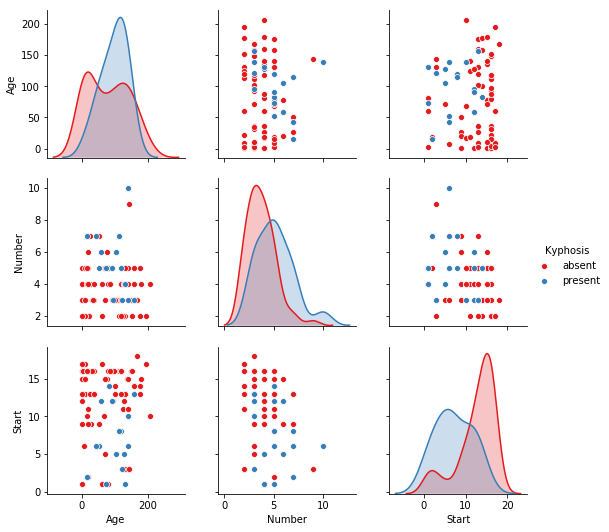

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree=DecisionTreeClassifier()

In [16]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
predictions=dtree.predict(x_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

   micro avg       0.72      0.72      0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [22]:
print(confusion_matrix(y_test,predictions))

[[17  2]
 [ 5  1]]


In [26]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [29]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [30]:
dot_data=StringIO()

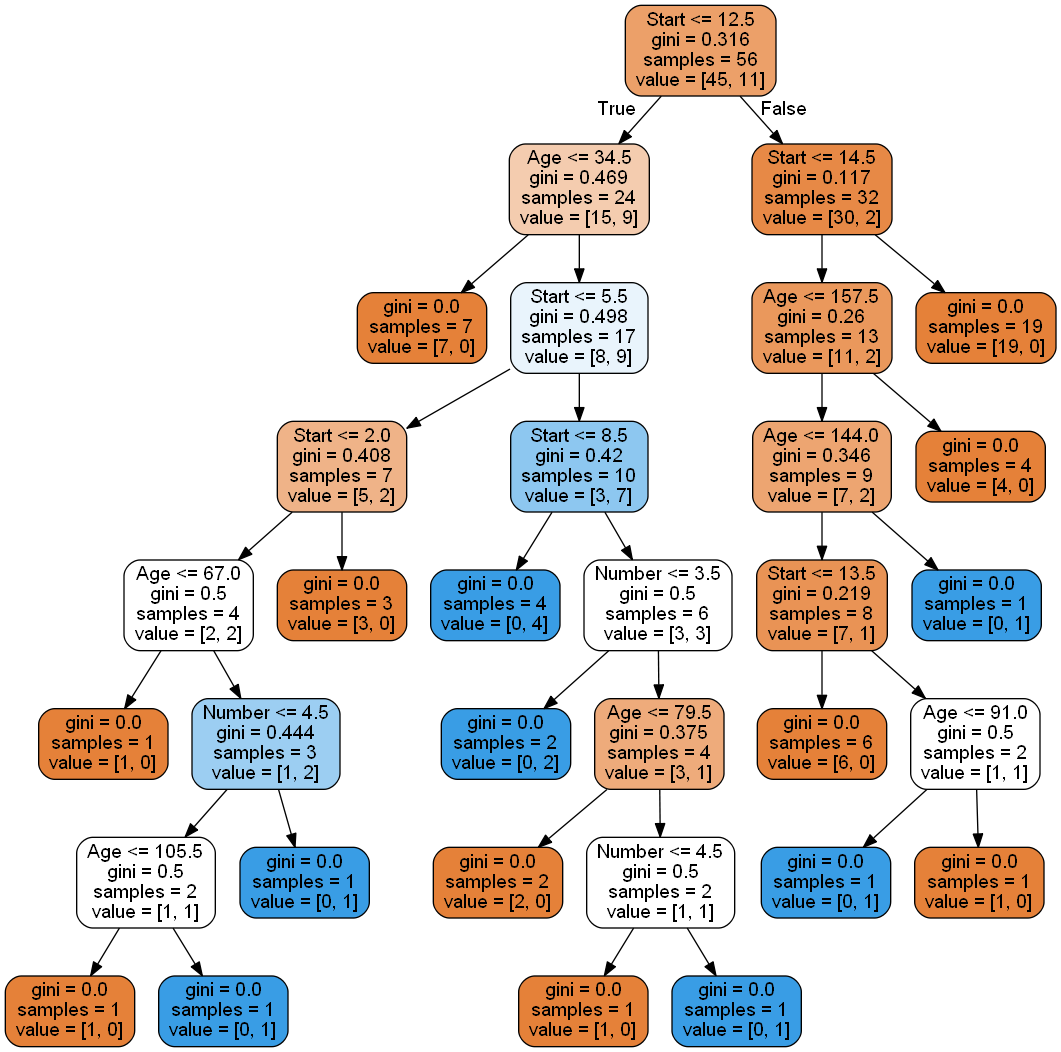

In [31]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
rfc_pred=rfc.predict(x_test)

In [35]:
print(confusion_matrix(y_test,rfc_pred))

[[19  0]
 [ 5  1]]


In [36]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

   micro avg       0.80      0.80      0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [38]:
loan=pd.read_csv('loan_data.csv')

In [39]:
loan

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
5                 1         credit_card    0.0788       125.13   
6                 1  debt_consolidation    0.1496       194.02   
7                 1           all_other    0.1114       131.22   
8                 1    home_improvement    0.1134        87.19   
9                 1  debt_consolidation    0.1221        84.12   
10                1  debt_consolidation    0.1347       360.43   
11                1  debt_consolidation    0.1324       253.58   
12                1  debt_consolidation    0.0859       316.11   
13                1      small_business    0.0714        92.82   
14                1  debt_consolidation    0.0863       209.54   
15                1      major_purchase    0.1103       327.53   
16                1           all_other    0.1317        77.69   
17                1         credit_card    0.0894       476.58   
18                1  debt_consolidation    0.1039       584.12   
19                1      major_purchase    0.1513       173.65   
20                1           all_other    0.0800       188.02   
21                1           all_other    0.0863       474.42   
22                1         credit_card    0.1355       339.60   
23                1         credit_card    0.0788       484.85   
24                1  debt_consolidation    0.1229       320.19   
25                1           all_other    0.0901       159.03   
26                1           all_other    0.0743       155.38   
27                1  debt_consolidation    0.1375       255.43   
28                1           all_other    0.0743       155.38   
29                1           all_other    0.0743       155.38   
...             ...                 ...       ...          ...   
9548              0    home_improvement    0.1607        87.99   
9549              0    home_improvement    0.2164       729.70   
9550              0           all_other    0.1459       137.86   
9551              0    home_improvement    0.1348       508.87   
9552              0  debt_consolidation    0.1311       337.45   
9553              0  debt_consolidation    0.1385       545.67   
9554              0      small_business    0.1533       870.71   
9555              0    home_improvement    0.1311       674.90   
9556              0  debt_consolidation    0.1385       136.42   
9557              0         credit_card    0.1025       466.35   
9558              0  debt_consolidation    0.1533       696.57   
9559              0         credit_card    0.1273       688.11   
9560              0           all_other    0.1867       547.36   
9561              0           all_other    0.0788       115.74   
9562              0  debt_consolidation    0.1348       508.87   
9563              0  debt_consolidation    0.1099       556.50   
9564              0           all_other    0.1385       511.56   
9565              0           all_other    0.1459       396.35   
9566              0           all_other    0.2164       551.08   
9567              0           all_other    0.1311       101.24   
9568              0           all_other    0.1979        37.06   
9569              0    home_improvement    0.1426       823.34   
9570              0           all_other    0.1671       113.63   
9571              0           all_other    0.1568       161.01   
9572              0  debt_consolidation    0.1565        69.98   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1

In [40]:
loan.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [44]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [45]:
loan.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

Text(0.5, 0, 'FICO')

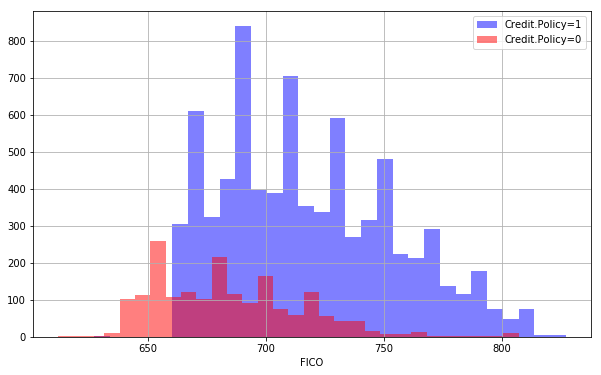

In [46]:
plt.figure(figsize=(10,6))
loan[loan['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loan[loan['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

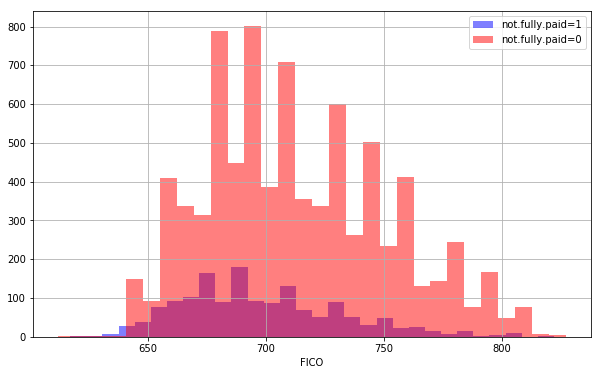

In [50]:
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

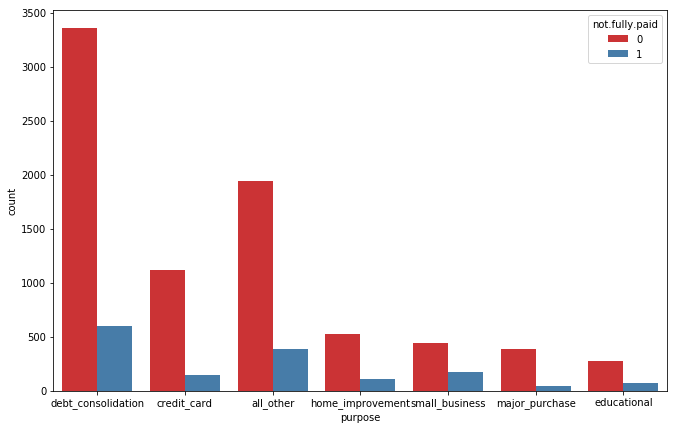

In [51]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loan,palette='Set1')

C:\Users\RAJATHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


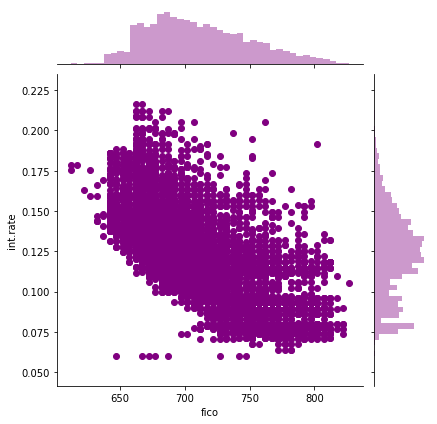

In [52]:
sns.jointplot(x='fico',y='int.rate',data=loan,color='purple')

<Figure size 792x504 with 0 Axes>

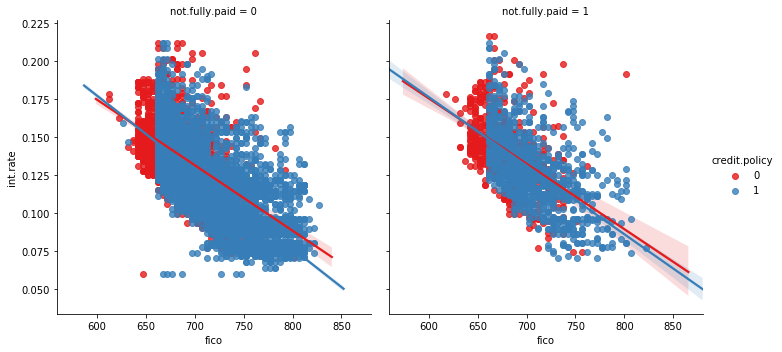

In [54]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [55]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [56]:
cat_feats=['purpose']

In [57]:
final_data=pd.get_dummies(loan,columns=cat_feats,drop_first=True)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [60]:
dtree=DecisionTreeClassifier()

In [61]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
predictions=dtree.predict(x_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [66]:
print(confusion_matrix(y_test,predictions))

[[2001  430]
 [ 336  107]]


In [72]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
features=list(x_train[1:])
features

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [73]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [74]:
dot_data=StringIO()


In [75]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [77]:
from sklearn.datasets import load_iris 
iris = load_iris() 
  
# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target 
  
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
  
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0
